In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

def mask_composite(ds, var, start_year=0, min_lat=-90, max_lat=90, min_lon=0, max_lon=360):
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    
    idx_region = (ds.snap_time.dt.year > start_year) & (ds.snap_lat >= min_lat) & (ds.snap_lat <= max_lat) & \
    (ds.snap_lon >= min_lon) & (ds.snap_lon <= max_lon)
    
    test = ds[var][idx_region,:,:]
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)

    out_masked = xr.where(mask, test, np.nan)
    return out_masked

def mask_composite_season(ds, var, idx_season):
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    
    test = ds[var][idx_season,:,:]
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)

    out_masked = xr.where(mask, test, np.nan)
    return out_masked

In [3]:
fpath = "/work/Katherine.Turner/tempest-extremes/ERA5"

#ds_slp = xr.open_dataset(f"{fpath}/comp_slp/comp_msl.nc", use_cftime=True)
era_wind = xr.open_mfdataset(f"{fpath}/comp_wind/comp_*10.nc", use_cftime=True)
#ds_temp = xr.open_dataset(f"{fpath}/comp_temp/comp_t2m.nc", use_cftime=True)
era_temp_anom = xr.open_dataset(f"{fpath}/comp_temp/comp_t2m_anom.nc", use_cftime=True)
era_precip_anom = xr.open_dataset(f"{fpath}/comp_precip/comp_tp_anom.nc", use_cftime=True)

In [4]:
fpath = "/work/Katherine.Turner/tempest-extremes/odiv-251" 

#ds_slp = xr.open_dataset(f"{fpath}/comp_SLP/comp_slp.nc", use_cftime=True)
cm_wind = xr.open_mfdataset(f"{fpath}/comp_wind/comp_*_ref.nc", use_cftime=True)
cm_prlq = xr.open_dataset(f"{fpath}/comp_prlq/comp_prlq_anom.nc", use_cftime=True)
cm_prsn = xr.open_dataset(f"{fpath}/comp_prsn/comp_prsn_anom.nc", use_cftime=True)
cm_temp = xr.open_dataset(f"{fpath}/comp_temp/comp_t_ref_anom.nc", use_cftime=True)

In [9]:
cm_temp_masked = mask_composite(cm_temp, "snap_t_ref_anom")
era_temp_masked = mask_composite(era_temp_anom, "snap_t2m_anom")

cm_temp_comp = cm_temp_masked.mean(dim="snapshot")
era_temp_comp = era_temp_masked.mean(dim="snapshot")

xr.corr(cm_temp_comp, era_temp_comp)

In [10]:
cm_prlq_masked = mask_composite(cm_prlq, "snap_prlq_anom")
cm_prsn_masked = mask_composite(cm_prsn, "snap_prsn_anom")
era_precip_masked = mask_composite(era_precip_anom, "snap_tp_anom")

cm_precip_comp = (cm_prsn_masked + cm_prlq_masked).mean(dim="snapshot")
era_precip_comp = era_precip_masked.mean(dim="snapshot")

xr.corr(cm_precip_comp, era_precip_comp)

<xarray.DataArray ()>
array(0.9884396)

In [12]:
test = xr.open_dataset("/work4/k2t/tempest-extremes/odiv-251/comp_tos/test.nc", use_cftime=True)

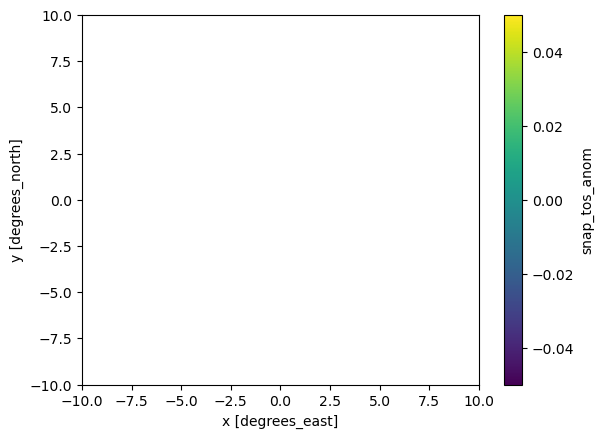

In [16]:
test.snap_tos_anom[10,:,:].plot()